In [28]:
import pandas as pd
from scipy import sparse
from tqdm import tqdm
import anndata
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

In [3]:
paragraphs = pd.read_csv('gutenberg_paragraphs.csv', index_col = 0)

In [6]:
paragraphs.head(2)

,country,paragraph,book
0,New Zealand,"Cook's names have rarely been altered, and New Zealand and Australian places will probably for all time bear those which he bestowed.","1770 Captain Cook's Journal During the First Voyage Round the World, by James Cook"
1,New Zealand,"Abel Tasman, in 1642, coming across the Indian Ocean from the westward, had touched at Tasmania, or, as he called it, Van Diemen's Land, had skirted the western coast of the north island of New Zealand without landing, and had stretched away to the north-east, and found the Tonga Group.","1770 Captain Cook's Journal During the First Voyage Round the World, by James Cook"


In [7]:
# this needs to be enfastened...create a list of unique words from a list of sentences
unique_words = list(set.union(*paragraphs['paragraph'].str.replace('[^\w\s]','').str.split(' ').map(set).to_list()))

In [8]:
len(unique_words)

52236

In [9]:
unique_words[:10]

['',
 'motive1210',
 'Anarchique_',
 'Deutscher',
 'themselves644',
 'unworthy',
 'throws',
 'gazelles',
 'scandinave',
 'vastly']

In [11]:
X = sparse.dok_matrix((paragraphs.shape[0], len(unique_words)))
X

<10726x52236 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Dictionary Of Keys format>

In [13]:
# this needs to be enfastened...
# create a matrix of number of occurrences of words in sentences
# each row is a sentence, each column is a word
# eg if potato and banana occur in sentence #4, then in column #4 add 1 to
# the potato entry and 1 to the banana entry
row = 0
for paragraph in tqdm(paragraphs['paragraph'].values):
    for i, word in enumerate(unique_words):
        if word in paragraph:
            X[row, i] = 1
        
    row += 1

100%|██████████| 10726/10726 [10:10<00:00, 17.57it/s]


In [14]:
paragraphs

,country,paragraph,book
0,New Zealand,"Cook's names have rarely been altered, and New Zealand and Australian places will probably for all time bear those which he bestowed.","1770 Captain Cook's Journal During the First Voyage Round the World, by James Cook"
1,New Zealand,"Abel Tasman, in 1642, coming across the Indian Ocean from the westward, had touched at Tasmania, or, as he called it, Van Diemen's Land, had skirted the western coast of the north island of New Zealand without landing, and had stretched away to the north-east, and found the Tonga Group.","1770 Captain Cook's Journal During the First Voyage Round the World, by James Cook"
2,Tonga,"Abel Tasman, in 1642, coming across the Indian Ocean from the westward, had touched at Tasmania, or, as he called it, Van Diemen's Land, had skirted the western coast of the north island of New Zealand without landing, and had stretched away to the north-east, and found the Tonga Group.","1770 Captain Cook's Journal During the First Voyage Round the World, by James Cook"
3,China,"Wallis followed nearly on Byron's track: went from the Ladrones, through the China Sea, to Batavia, and so home, arriving in May 1768.","1770 Captain Cook's Journal During the First Voyage Round the World, by James Cook"
4,Tonga,"Tasman had laid down the south point of Tasmania, the western coast of the North Island of New Zealand, and the Tonga Islands. Dampier and Carteret had shown that New Britain and New Ireland were separate islands, lying north-east of New Guinea. Quiros had found the northern island of the New Hebrides.","1770 Captain Cook's Journal During the First Voyage Round the World, by James Cook"
...,...,...,...
10721,Austria,"Vittorio Veneto, 75, 77; vindication of fruits of, xvii, 107, 151, 154, 160, 164; greatness of victory of, 110; Austria crushed at, 135; Fascista Government, the Government of, 333","1923 Mussolini as revealed in his political speeches, November 1914-August 1923, by Benito Mussolini"
10722,Israel,"I am not one of those who believe that the voice of the people is, without exception, the voice of God. It was not so at the Deluge, but quite the reverse. It was not so when Israel clamored for a king--not in mercy but in anger, God gave them their request. It was not so when Absalom stole the hearts of the people, and stirred up rebellion against his father. And yet, when a nation, independent of party, free from the excitements of momentary interest, without the influence of ambitious leaders, under the calm guidance of reason, history, and the spirit of the age,--rises spontaneously against oppression, against iniquity, and _demands_ just laws; rights for all; free thought, free speech, free labor, free worship; when compacts are not violated; when moderation is maintained; when the spirit of humanity is preserved,--_then_, I believe, ""the voice of the people _is_ the voice of God."" I have no question that, in the great principle, Cromwell and his puritan hosts were right in their revolutionary action. I could never doubt that our fathers did a noble, glorious, and Christian deed in throwing off the yoke of Britain, and proclaiming a new government for themselves and their posterity. It was right to contend and bleed for equal representation, for freedom of conscience, and for an independent nationality in which these high ends could be secured.",1961 Government and Rebellion by E. E. Adams
10723,France,"The revolutions of France have been of a similar character; they have sprung from oppression of the most severe and unnatural kind. This was the fact, at least, in 1797 and in 1830. In 1848, when it was my lot to be in the midst of it, the revolution arose from the selfish conduct of Louis Philippe, who enriched himself and his family out of the national treasury, and encouraged his sons in a course which was at war with national precedent, with the commercial interests and democratic individualism of the French; for with their imperial prestiges and tastes they are ext

In [15]:
X = X.tocsr()

In [17]:
X

<10726x52236 sparse matrix of type '<class 'numpy.float64'>'
	with 3342494 stored elements in Compressed Sparse Row format>

In [19]:
adata = anndata.AnnData(X, obs = paragraphs, var = pd.DataFrame(index = unique_words))
adata

/Users/munfred/anaconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 10726 × 52236
    obs: 'country', 'paragraph', 'book'

In [20]:
adata.var

""
""
motive1210
Anarchique_
Deutscher
themselves644
...
exclusiveness
Dasturs
visible
embedded


In [21]:
adata.write('gutenberg_paragraphs0117.h5ad')

... storing 'country' as categorical
... storing 'paragraph' as categorical
... storing 'book' as categorical


In [22]:
ls -lah

total 1374856
drwxr-xr-x  19 munfred  staff   646B Jan 17 20:02 ./
drwxr-xr-x  36 munfred  staff   1.2K Jan 15 15:35 ../
drwxr-xr-x  12 munfred  staff   408B Jan 15 11:33 .git/
-rw-r--r--   1 munfred  staff   444B Jan 15 11:35 .gitignore
drwxr-xr-x   8 munfred  staff   272B Jan 17 19:47 .ipynb_checkpoints/
-rw-r--r--   1 munfred  staff    20K Jan 17 19:49 210114 Read txt data.ipynb
-rw-r--r--   1 munfred  staff    20K Jan 15 11:37 210114 Test some statistics.ipynb
-rw-r--r--   1 munfred  staff   4.5M Jan 17 14:20 210114 scVI.ipynb
-rw-r--r--   1 munfred  staff    36K Jan 17 20:01 210117 Make word count matrix.ipynb
-rw-r--r--   1 munfred  staff    38K Jan 17 19:47 210117 Split gutenberg to paragraphs.ipynb
-rw-r--r--   1 munfred  staff   139B Jan 15 11:33 README.md
-rw-r--r--   1 munfred  staff   1.8K Jan 17 14:33 countries
-rw-r--r--   1 munfred  staff   1.8K Jan 17 14:33 countries.1
-rw-r--r--   1 munfred  staff    12M Jan 17 19:47 gutenberg_paragraphs.csv
-rw-r--r--   1 munfred  sta

In [25]:
frac_zeros = np.array(1 - (adata.X > 0).mean(1))[:, 0]
means = np.array((adata.X).mean(1))[:, 0]

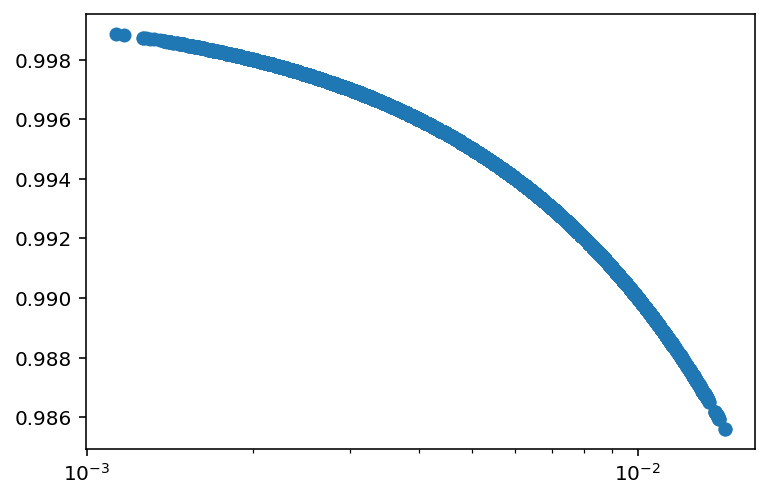

In [29]:
plt.scatter(means, frac_zeros)
plt.xscale('log')